In [ ]:
from cs103 import *



# CPSC 103 - Systematic Program Design
# Module 07b Day 1
Rik Blok, with thanks to Jessica Wong and Giulia Toti

---

# Reminders

- this Wed-Fri: Module 7 Week 2 Tutorial Attendance
- **Thu**: Will finish today's notebook.  Then open office hours for rest of class.  We'll bring an extra TA to help.  Come prepared with your questions about your project!
- Fri: ⚠️ [Project Milestone](https://canvas.ubc.ca/courses/106343/assignments/1425107)
- Mon: Module 7 (HtDAP): Worksheet
- Mon: Module 8: Pre-Lecture Assignment
- Starting **next** week (Wed Nov 29): Tutorial sessions will be open office hours, for project help

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

---

# How to Design Analysis Programs (HtDAP)

The steps in the HtDAP recipe are: 
1. Planning
<ol style="list-style-type:lower-alpha">
    <li>✅ Plan input: Identify the information in the file your program will read.</li>
    <li>✅ Plan output: Write a description of what your program will produce.</li>
    <li>✅ Plan examples: Write or draw examples of what your program will produce.</li>
</ol>
2. Designing the program
<ol style="list-style-type:lower-alpha">
    <li>✅ Design data definitions.</li>
    <li>✅ Design read function: Design a function to read the information and store it as data in your program.</li>
    <li>▶️ Design analyze function: Design functions to analyze the data.</li>
</ol>

---

### Step 2a: Design data definitions - Example
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the *chart or graph* that you'll produce when you complete step 2c.
 
<div class="alert alert-success">
    
✅ For this example, we'll skip the "chart or graph" part and design our program to produce a numerical quantity, instead (a particular hour of the day).
    
</div>

<font color="blue">
    
We want to represent the type of crime and the hour it occurred.
    
Type of crime best represented by an enumeration (4 cases).
    
Hour can be represented by an interval, integer in the range [0,23].
    
We'll also check the minute, just to see if the data is reliable.  But we don't need to store the minute.

</font>

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Design data definitions

In [ ]:
from typing import NamedTuple, List
import csv
from enum import Enum

##################
# Data Definitions


CrimeType = Enum('CrimeType', 
                 ['BEC', 'BER', 'TV', 'TB'])

#interp. A crime type, one of:
#    BNE Commercial (BEC)
#    BNE Residential/Other (BER)
#    Theft of Vehicle (TV)
#    Theft of Bicycle (TB)

# examples are redundant for enumerations

# template based on enumeration (4 cases)
@typecheck
def fn_for_crime_type(ct: CrimeType) -> ...:
    if ct == CrimeType.BEC:
        return ...
    elif ct == CrimeType.BER:
        return ...
    elif ct == CrimeType.TV:
        return ...
    elif ct == CrimeType.TB:
        return ...
    

CrimeData = NamedTuple('CrimeData',
                       [('type', CrimeType),
                        ('hour', int)]) # in range [0,23]

# interp. Data about a crime, including 
# the type of crime and the hour it occurred

CD1 = CrimeData(CrimeType.BEC, 0)
CD2 = CrimeData(CrimeType.BER, 23)
CD3 = CrimeData(CrimeType.TV, 8)
CD4 = CrimeData(CrimeType.TB, 16)

# template based on compound (2 fields)
# and reference rule
@typecheck
def fn_for_crime_data(cd: CrimeData) -> ...:
    return ...(fn_for_crime_type(cd.type), cd.hour)


# List[CrimeData]
# interp. a list of CrimeData

LOCD0 = []
LOCD1 = [CD1]
LOCD2 = [CD1, CD2, CD3, CD4]

# template based on arbitrary-sized and reference rule
@typecheck
def fn_for_locd(locd: List[CrimeData]) -> ...:
    # description of the accumulator
    acc = ...      # type: ...
    for cd in locd:
        acc = ...(fn_for_crime_data(cd), acc)
    return ...(acc)



### Additional generic data definitions

We'll see later that we need to use some generic data types, `List[int]` and `List[str]`, so let's define those here:

In [ ]:
# Here are some definitions we'll need later on that 
# aren't particularly interesting to work on in class!

# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ['hello', 'world']

# template based on arbitrary-sized data
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for s in los:
        acc = ...(s, acc)
        
    return ...(acc)


# List[int]
# interp. a list of integers
LOI0 = []
LOI1 = [1, -12]

# template based on arbitrary-sized data
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for i in loi:
        acc = ...(i, acc)
        
    return ...(acc)



# Step 2b: Design `read` function
## Structure of `read`

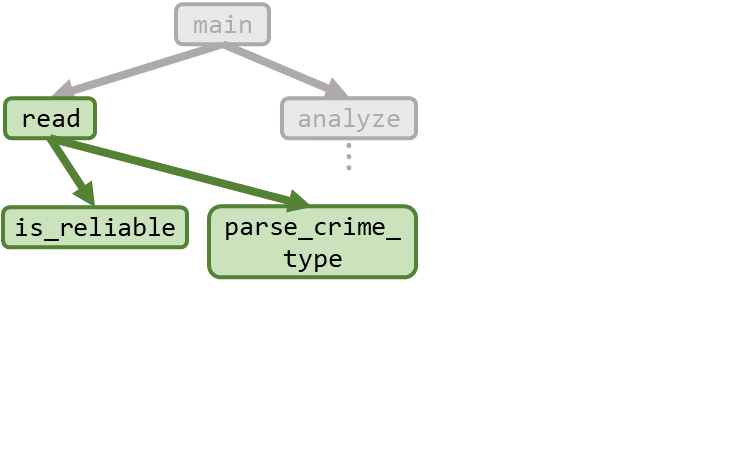

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

# Helper: Parsing `CrimeType` with `parse_crime_type`

Here's the helper function `parse_crime_type` to parse a string into a `CrimeType`.  It was designed using our good old HtDF recipe.  (The function wasn't designed in class because we're all familiar with the recipe by now 🙂  We just need to run this cell.)

Notice that this function takes a string as input, not a `CrimeType`.  (That's the *output*!)

In [ ]:
@typecheck
def parse_crime_type(s:str) -> CrimeType:
    """
    Returns the string s as a CrimeType.
    
    Assumes s is one of the following:
        "Break and Enter Commercial"
        "Break and Enter Residential/Other"
        "Theft of Bicycle"
        "Theft of Vehicle"
    """
    # return CrimeType.BEC # stub
    # template from atomic non-distinct
    # return ...(s)
    if s == "Break and Enter Commercial":
        return CrimeType.BEC
    elif s == "Break and Enter Residential/Other":
        return CrimeType.BER
    elif s == "Theft of Bicycle":
        return CrimeType.TB
    elif s == "Theft of Vehicle":
        return CrimeType.TV
    
    
start_testing()

expect(parse_crime_type("Break and Enter Commercial"), CrimeType.BEC)
expect(parse_crime_type("Break and Enter Residential/Other"), CrimeType.BER)
expect(parse_crime_type("Theft of Bicycle"), CrimeType.TB)
expect(parse_crime_type("Theft of Vehicle"), CrimeType.TV)

summary()



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

# Helper: Checking for reliable data in a row with `is_reliable`

Your homework at the end of last class was to design the `is_reliable` function.  It should take in a list of strings and return `True` if either item `[4]` or `[5]` contains something other than `"0"` or `False` if both are `"0"`.

Here's my solution.  Notice that we don't use the arbitrary-sized template even though our "main character" `row_data` is a list, because it's not useful: we're not processing all items in the list.

In [ ]:
@typecheck
def is_reliable(row_data: List[str]) -> bool:
    """
    Returns True if none of the pertinent data in row_data is 
    missing, otherwise returns False.

    Missing data is indicated by a "0" in both items 4 and 5
    of the list.

    ASSUMES: row_data is a full row of values.  Specifically, 
    row_data[4] and row_data[5] must exist.
    """
    # return True # stub

    # no template used
    return row_data[4] != "0" or row_data[5] != "0"


start_testing()

expect(is_reliable(["0", "0", "0", "0", "1", "0"]), True)
expect(is_reliable(["0", "0", "0", "0", "0", "1"]), True)
expect(is_reliable(["Theft of Bicycle", "2023", "11", "21",
                    "23", "59"]), True)
expect(is_reliable(["1", "1", "1", "1", "0", "0"]), False)

summary()



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

### Step 2b: Design `read` function - Example
#### Design a function to read the information and store it as data in your program

In [ ]:
@typecheck
def read(filename: str) -> List[CrimeData]:
    """    
    reads information from the specified file 
    and returns a list of crime data.
    
    Rows with missing times (hour and minute are zero)
    are skipped.
    """
    #return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CrimeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row_data in reader:
            # you may not need to store all the strings in the 
            # current row, and you may need to convert some
            # of the strings to other types
            if is_reliable(row_data):
                cd = CrimeData(parse_crime_type(row_data[0]), 
                               parse_int(row_data[4]))
                locd.append(cd)
    
    return locd


start_testing()

TEST_ALL_BEC = [CrimeData(CrimeType.BEC, 6),
                CrimeData(CrimeType.BEC, 18)] # missing data removed

# Examples and tests for read
expect(read('testfile_empty.csv'), [])
expect(read('testfile_all_missing.csv'), [])
expect(read('testfile_all_bec.csv'), TEST_ALL_BEC)

summary()



# Step 2c: Design `analyze` function

Design functions to analyze the data. 
- `main` is always small, simple and doesn’t change much from the template. 
- `analyze` is the function that works with the data returned from `read` function to return the final result.

---

# `main` function

Main is the function that represents your program, the one that is going to do the main basic functions of reading and analyzing the data.
- `read` imports domain’s information into our program as data. 
- `analyze` works on the data representation to create a result. 
- `main` coordinates both. We usually don’t rename it so all programs begin in the main function, regardless of the problem they are solving. 

```python
def main(filename: str) -> ...:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    # return ... # stub (make sure you update the ... with a value of the correct type)
    
    # Template from HtDAP, based on composition
    return analyze(read(filename))
```

---

# Structure of `main`

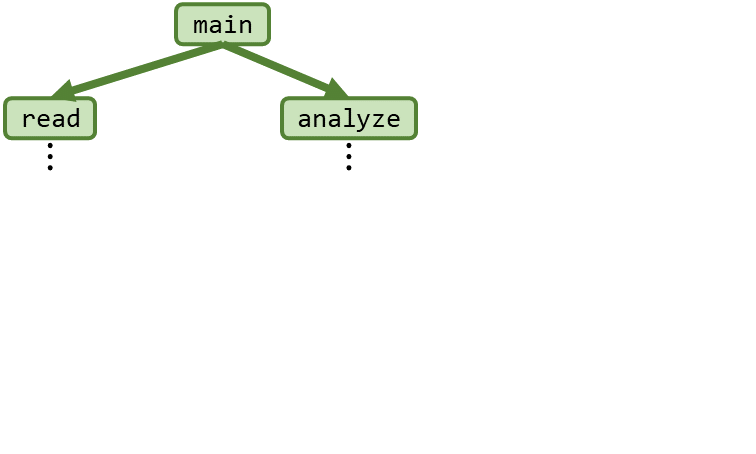

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker questions: True/False

Answer True or False to each of the following:

1. The `main` function performs all the calculations to solve your problem.

<details><summary style="cursor:pointer; display:list-item">Next</summary>

2. The `analyze` function calls the `read` function.
    
<details><summary style="cursor:pointer; display:list-item">Next</summary>

3. The `read` function translates the information in the CSV file into data your program can use.

</details>
</details>

<ol style="list-style-type:upper-alpha">
    <li>True</li>
    <li>False</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hints (for your review after class)</summary>

1. The `main` function calls the `analyze` function.  Which function performs the calculations?
2. Does a call to `read` occur within the body of the `analyze` function?
3. What is the purpose of the `read` function?

</details>  

---

# `analyze` function

This is the function that, given the data, returns the answer to the problem we are trying to solve. 
- It operates on the data, returning the final value. 
- If a graph is drawn, this function will also draw it. 
- It usually has a lot of helper functions, since its task is big. 
- We usually rename it to something more related to our problem. 

---

# `main`, `read`, and `analyze`

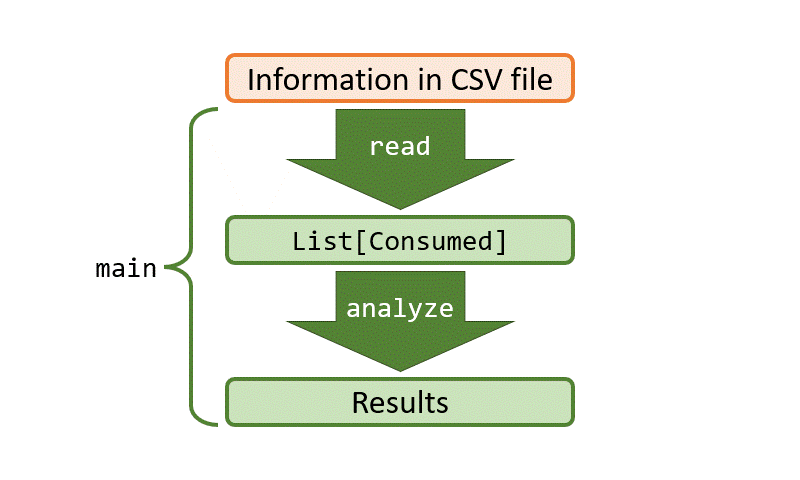

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker questions: More True/False

Answer True or False to each of the following:

4. Besides `read` and `analyze`, you'll probably need to create additional helper functions for `main`.

<details><summary style="cursor:pointer; display:list-item">Next</summary>

5. The purpose statement of the `main` function changes when you change the problem you are trying to solve.
    
<details><summary style="cursor:pointer; display:list-item">Next</summary>

6. All charts must be drawn in the `analyze` function (or some of its helpers).

</details>
</details>


<ol style="list-style-type:upper-alpha">
    <li>True</li>
    <li>False</li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hints (for your review after class)</summary>

4. `main` uses composition to offload the work into separate functions.  Is there anything remaining in `main` that can be delegated to a helper?
5. Which function is responsible for analyzing the data and solving the problem?  So, which function should have its purpose statement changed when you change the problem?
6. If drawing a chart is part of the purpose, then which function should be responsible for doing it?
    
</details>  

---

# Structure of `analyze`

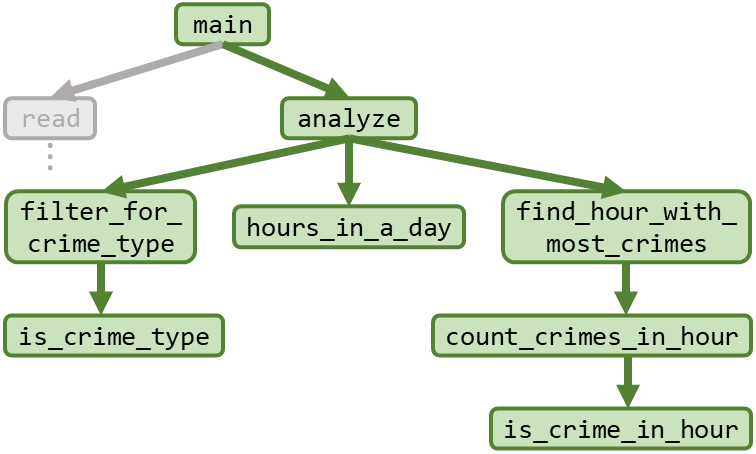

---

### Step 2c: Design `analyze` function - Example
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the `analyze` function so that the function name describes what your analysis function does.

<div class="alert alert-success">
    
✅ To make this manageable in class, we will provide some test data and finished helper functions.
    
</div>

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Parsed test data

Here are the test files parsed into `List[CrimeData]`.  I've included this info here so we can quickly add it as needed to our examples.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.


In [ ]:
# from 'testfile_empty.csv'
TEST_EMPTY = []

# from 'testfile_all_missing.csv'
TEST_ALL_MISSING = [CrimeData(CrimeType.BEC, 0), 
                    CrimeData(CrimeType.BER, 0),
                    CrimeData(CrimeType.TB, 0),
                    CrimeData(CrimeType.TV, 0)] # but none of these should be read

# from 'testfile_all_bec.csv'
TEST_ALL_BEC = [CrimeData(CrimeType.BEC, 6),
                CrimeData(CrimeType.BEC, 18)] # missing data removed

# from 'testfile_all_ber.csv'
TEST_ALL_BER = [CrimeData(CrimeType.BER, 21),
                CrimeData(CrimeType.BER, 17),
                CrimeData(CrimeType.BER, 0)]

# from 'testfile_all_tb.csv'
TEST_ALL_TB = [CrimeData(CrimeType.TB, 1),
               CrimeData(CrimeType.TB, 23),
               CrimeData(CrimeType.TB, 17)]

# from 'testfile_all_tv.csv'
TEST_ALL_TV = [CrimeData(CrimeType.TV, 23),
               CrimeData(CrimeType.TV, 14),
               CrimeData(CrimeType.TV, 21)]

# from 'testfile_all_types.csv'
TEST_ALL_TYPES = [CrimeData(CrimeType.BEC, 1), 
                  CrimeData(CrimeType.BER, 2),
                  CrimeData(CrimeType.TB, 3),
                  CrimeData(CrimeType.TV, 4)]

# from 'testfile_all_bec_hour_6.csv'
TEST_ALL_BEC_HOUR_6 = [CrimeData(CrimeType.BEC, 6),
                       CrimeData(CrimeType.BEC, 6)] # missing data removed

# from 'testfile_all_ber_hour_0.csv'
TEST_ALL_BER_HOUR_0 = [CrimeData(CrimeType.BER, 0),
                       CrimeData(CrimeType.BER, 0),
                       CrimeData(CrimeType.BER, 0)]



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Helper function: `filter_for_crime_type`
Here's a helper function (and it's lower-level helper) that we'll use later.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.

In [ ]:
@typecheck
def filter_for_crime_type(locd: List[CrimeData], ct: CrimeType) -> List[CrimeData]:
    """
    Returns only items in locd that have crime type ct.
    """
    # return [] # stub
    
    # template from List[CrimeData]
    
    # description of the accumulator
    matches = []      # type: List[CrimeData]
    
    for cd in locd:
        if is_crime_type(cd, ct):
            matches.append(cd)

    return matches


@typecheck
def is_crime_type(cd: CrimeData, ct: CrimeType) -> bool:
    """
    Returns True if cd has crime type `ct`, otherwise returns False.
    """
    # return False # stub

    # template from CrimeData with additional parameter ct
    return cd.type == ct


# Examples and tests for is_crime_type
start_testing()

# Test 1: does match
# Test 2: doesn't match
expect(is_crime_type(CrimeData(CrimeType.BEC, 0), CrimeType.BEC), True) # Test 1
expect(is_crime_type(CrimeData(CrimeType.BER, 1), CrimeType.BER), True) # Test 1
expect(is_crime_type(CrimeData(CrimeType.TB, 0), CrimeType.TV), False) # Test 2
expect(is_crime_type(CrimeData(CrimeType.TB, 2), CrimeType.TV), False) # Test 2

summary()


# Examples and tests for filter_for_crime_type
start_testing()

# Test 1: empty list
# Test 2: crime type doesn't match any
# Test 3: crime type matches some
expect(filter_for_crime_type([], CrimeType.BEC), []) # Test 1
expect(filter_for_crime_type(TEST_ALL_BEC, CrimeType.TV), []) # Test 2
expect(filter_for_crime_type(TEST_ALL_TB, CrimeType.BER), []) # Test 2
expect(filter_for_crime_type(TEST_ALL_BEC+TEST_ALL_BER, CrimeType.BEC), TEST_ALL_BEC) # Test 3
expect(filter_for_crime_type(TEST_ALL_BEC+TEST_ALL_BER, CrimeType.BER), TEST_ALL_BER) # Test 3

summary()


<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Helper function: `hours_in_a_day`
Here's a helper function that we'll use later.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.

In [ ]:
@typecheck
def hours_in_a_day() -> List[int]:
    """
    Returns a list of the hours in a day: [0,23].
    """
    # return [] # stub
    
    # no template
    hours = []
    
    for h in range(24): # range is like a list, but subtly different
        hours.append(h)
    # or just hours = list(range(24))
    
    return hours


# Examples and tests for hours_in_a_day
start_testing()

expect(hours_in_a_day(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

summary()


<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Helper function: `find_hour_with_most_crimes`
Here's a helper function (and it's lower-level helpers) that we'll use later.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.

In [ ]:

@typecheck
def find_hour_with_most_crimes(hours: List[int], locd: List[CrimeData]) -> int:
    """
    Returns hour in `hours` for which locd has the most occurrences.
    
    In case of a tie, returns earliest hour.
    
    Assumes `hours` is not empty.
    """
    # return -1 # stub
    
    # template from List[int] with extra parameter locd

    # maximum number of crimes by hour in list so far
    max_crimes = 0 # type: int
    
    # hour of maximum crimes in list so far
    hour_of_max_crimes = hours[0] # type: int
    
    for h in hours:
        crimes_in_hour = count_crimes_in_hour(locd, h)
        if crimes_in_hour > max_crimes:
            max_crimes = crimes_in_hour
            hour_of_max_crimes = h
        
    return hour_of_max_crimes


@typecheck
def count_crimes_in_hour(locd: List[CrimeData], hour: int) -> int:
    """
    Returns the number of crimes from `locd` that occur at a particular `hour`.
    """
    # return -1 # stub
    
    # template from List[CrimeData] with extra parameter hour
    
    # count of crimes in given hour in list so far
    count = 0      # type: int
    for cd in locd:
        if is_crime_in_hour(cd, hour):
            count = count + 1
    return count


@typecheck
def is_crime_in_hour(cd: CrimeData, hour: int) -> bool:
    """
    Returns True if crime `cd` occurred during `hour`, otherwise False.
    """
    # return False # stub

    # template from CrimeData with extra parameter hour
    return cd.hour == hour


# Examples and tests for is_crime_in_hour
start_testing()

# Test 1: Crime is not in hour
# Test 2: Crime is in hour
expect(is_crime_in_hour(CrimeData(CrimeType.BEC, 7), 0), False) # Test 1
expect(is_crime_in_hour(CrimeData(CrimeType.BEC, 7), 7), True) # Test 2
expect(is_crime_in_hour(CrimeData(CrimeType.TV, 0), 0), True) # Test 2

summary()


# Examples and tests for count_crimes_in_hour
start_testing()

# Test 1: Empty crime data list
# Test 2: Not empty but no crimes in given hour
# Test 3: Crimes in given hour, of various types
expect(count_crimes_in_hour([], 1), 0) # Test 1
expect(count_crimes_in_hour(TEST_ALL_BER, 1), 0) # Test 2
expect(count_crimes_in_hour(TEST_ALL_BER, 17), 1) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TB+TEST_ALL_TV, 23), 2) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TB+TEST_ALL_TV, 17), 1) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TV+TEST_ALL_TB, 23), 2) # Test 3 (crimes shuffled)

summary()


# Examples and tests for find_hour_with_most_crimes
start_testing()

# Test 1: Empty crime data list
# Test 2: Not empty but no crimes in given hours
# Test 3: Crimes in given hours, of various types
expect(find_hour_with_most_crimes([1], []), 1) # Test 1
expect(find_hour_with_most_crimes([5, 6, 7, 8], TEST_ALL_TYPES), 5) # Test 2
expect(find_hour_with_most_crimes([8, 7, 6, 5], TEST_ALL_TYPES), 8) # Test 2 (hours reversed)
expect(find_hour_with_most_crimes([3, 4, 5, 6], TEST_ALL_TYPES), 3) # Test 3
expect(find_hour_with_most_crimes([6, 5, 4, 3], TEST_ALL_TYPES), 4) # Test 3 (hours reversed)
expect(find_hour_with_most_crimes([1, 14, 17, 21, 23], TEST_ALL_TB+TEST_ALL_TV), 23) # Test 3 (mixed crime types)
expect(find_hour_with_most_crimes([1, 14, 17, 21, 23], TEST_ALL_TV+TEST_ALL_TB), 23) # Test 3 (crimes shuffled)

summary()


<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function---Example">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">find_hour_with_most_crimes</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-find_hour_with_most_crimes">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### `main` and `analyze` functions

Here are our `main` and `analyze` functions.  Let's start here.

Later we'll look at the [parsed test data](#Parsed-test-data) and these helpers, from above:
- [`filter_for_crime_type`](#Helper-function:-filter_for_crime_type)
- [`hours_in_a_day`](#Helper-function:-hours_in_a_day)
- [`find_hour_with_most_crimes`](#Helper-function:-find_hour_with_most_crimes)

Recall, our purpose was:

> Given a type of crime, find the time of day (hour) with the highest frequency


In [ ]:
###########
# Functions

@typecheck
def main(filename: str) -> ...:
    """
    Reads the file from given filename, analyzes the data, returns the result 
    """
    return ... # stub (make sure you update the ... with a value of the correct type)

    # Template from HtDAP, based on function composition 
    # return analyze(read(filename)) 
    
    
@typecheck
def analyze(loc: List[Consumed]) -> Produced: 
    """ 
    ... 
    """ 

    return ...


# Examples and tests for main
start_testing()

expect(..., ...)

summary()


# Examples and tests for analyze 
start_testing()

expect(..., ...) 

summary()


<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
###########
# Functions

@typecheck
def main(filename: str, 
         crime_type: CrimeType) -> int:
    """
    Reads the file from given filename, analyzes the data, returns the result 
    """
    # return -1 # stub
    
    # Template from HtDAP, based on function composition 
    return analyze(read(filename), crime_type) 
    
    
@typecheck
def analyze(locd: List[CrimeData], 
            crime_type: CrimeType) -> int: 
    """ 
    Returns the hour at which crimes of type
    crime_type were most common in the list
    locd.
    
    Returns earliest hour in the case of a tie.
    """ 

    # return -1 # stub
    
    # template based on composition
    # Step 1: filter list for crime type
    # Step 2: build a list of hours of the day
    # Step 3: find hour of the day most common in list
    # Step 4: return that hour
    crimes_of_type = filter_for_crime_type(locd, crime_type) # Step 1
    hours = hours_in_a_day() # Step 2
    worst_hour = find_hour_with_most_crimes(hours, crimes_of_type) # Step 3
    return worst_hour # Step 4

# Examples and tests for analyze
start_testing()

# Test 1: empty list
# Test 2: no matching crime type
# Test 3: some matching crime types
expect(analyze([], CrimeType.BEC), 0) # Test 1
expect(analyze(TEST_ALL_BEC, CrimeType.BER), 0) # Test 2
expect(analyze(TEST_ALL_BEC, CrimeType.TB), 0) # Test 2
expect(analyze(TEST_ALL_BEC, CrimeType.TV), 0) # Test 2
expect(analyze(TEST_ALL_BEC, CrimeType.BEC), 6) # Test 3
expect(analyze(TEST_ALL_BER_HOUR_0, CrimeType.BER), 0) # Test 3
expect(analyze(TEST_ALL_BEC+TEST_ALL_BEC_HOUR_6, CrimeType.BEC), 6) # Test 3
expect(analyze(TEST_ALL_BEC_HOUR_6+TEST_ALL_BEC, CrimeType.BEC), 6) # Test 3

summary()


# Examples and tests for main 
start_testing()

# Test 1: empty file
# Test 2: invalid data
# Test 3: no matching crime types
# Test 4: some matching crime types
expect(main('testfile_empty.csv', CrimeType.BEC), 0) # Test 1
expect(main('testfile_all_missing.csv', CrimeType.BER), 0) # Test 2
expect(main('testfile_all_bec.csv', CrimeType.BER), 0) # Test 3
expect(main('testfile_all_bec.csv', CrimeType.TB), 0) # Test 3
expect(main('testfile_all_bec.csv', CrimeType.TV), 0) # Test 3
expect(main('testfile_all_bec.csv', CrimeType.BEC), 6) # Test 4
expect(main('testfile_all_ber_hour_0.csv', CrimeType.BER), 0) # Test 4

summary()
```

---

# Our work is done 🙂

All that remains is to run our program on the full dataset.  

Recall, our purpose was:

> Given a type of crime, find the time of day (hour) with the highest frequency

So let's find out for each type of crime...

In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.BEC) # BNE Commercial



In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.BER) # BNE Residential/Other



In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.TB) # Theft of Bicycle



In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.TV) # Theft of Vehicle

